# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from utilities import plot_y_pred

def sigmoid(x):
    return 1/(1+np.exp(-x))

Likelihood Function

To derive the loss function, we first need to use the maximum likelihood estimation (MLE)

We want to maximize the likelihood of correctly predicting the output y

$$
P(y_i = 1 | x_i; w) = sigmoid(w^T x_i) = y\_pred \\
P(y_i = 0 | x_i; w) = 1 - sigmoid(w^T x_i) = 1 - y\_pred
$$

Combining the likelihood of both binary cases:

$$
\begin{align}
\text{Likelihood} &= \prod_{i}^{N} \left(sigmoid(w^T x_i)^y \cdot (1 - sigmoid(w^T x_i))^{(1-y)} \right) \\
&= \prod_{i}^{N} \left(y\_pred^y \cdot (1 - y\_pred)^{(1-y)}\right)
\end{align}
$$

In [80]:
def likelihood(X, w, y):
    y_pred = sigmoid(np.dot(X, w))
    return y_pred ** y * (1 - y_pred) ** (1 - y)
    

To simplify the calculations, we will take the log of the likelihood function

$$
\text{Likelihood} = \sum_{i}^{N} \left(y \log(y\_pred) \cdot (1 - y) \log(1 - y\_pred) \right)
$$

and the loss function is just the negative of that

$$
\text{Loss} = - \text{Likelihood} = - \sum_{i}^{N} \left(y \log(y\_pred) \cdot (1 - y) \log(1 - y\_pred) \right)
$$

In [81]:
def loss(X, w, y):
    return -np.log(likelihood(X, w, y))

Now to optimize the loss function, we need to derive the gradient of the loss function

$$
\begin{align*}
\frac{\partial \text{Loss}}{\partial w} = \frac{\partial}{\partial w} \left(y \log(y\_pred) \cdot (1 - y) \log(1 - y\_pred) \right) \\ 
\because \frac{\partial y\_pred}{\partial x} = \frac{\partial \sigma(x)}{\partial x} = \sigma(x)(1 - \sigma(x)) \\
\therefore -y \frac{y\_pred (1 - y\_pred)}{y\_pred} \; x + (1 - y) \frac{y\_pred (1 - y\_pred)}{1-y\_pred} \; x \tag*{(Applying chain rule)} \\
-y (1 - y\_pred) \cdot x + (1 - y) y\_pred \cdot x \tag*{(Simplification)} \\
(y - y\_pred) \cdot x \tag*{(Simplifying further)} \\
\end{align*}
$$

In [82]:
def loss_gradient(X, w, y):
    """Compute the gradient of the neg-log-loss

    Args:
        X (n_samples, n_features)
        w (n_features)
        y (n_samples)

    Returns: gradient of the loss function (n_features)
    """
    y_pred = sigmoid(np.dot(X, w))
    return np.dot(X.T, (y_pred - y))

Putting all together

In [87]:
def logistic_regression(X, y, learning_rate=0.0001, max_iter=1000):
    print("Feature matrix X:\n", X[:2])
    print("Target labels y:\n", y[:2])
    
    # initialize the weights to zero, the weight dimension is the same as the number of features
    w = np.zeros(X.shape[1])
    y_pred = sigmoid(np.dot(X, w))

    # plot the relationship between the random predictions and labels
    plot_y_pred(y, y_pred)
    
    for i in range(max_iter):
        if i % (max_iter // 10) == 0:
            print(f"Iteration {i}: {np.mean(loss(X, w, y))=}")

        # update weights
        w -= learning_rate * loss_gradient(X, w, y)
    return w

To Test the implementation

Feature matrix X:
 [[-0.18405024  0.05727467  0.96621115  0.52558554  0.45008887 -2.1872648
   0.41993122  1.16963929  0.01971428  0.95192402  0.25185295  1.24191827
  -3.14055963  2.50218672  0.2351216  -0.08545464 -0.2894453  -0.54266456
   1.81964674 -0.39849407 -0.35764221 -1.76718851  0.45055801 -0.79954287
   1.53656269  0.00711055  1.7210215  -0.47740221  0.21520613  0.21338275]
 [-0.57968892 -0.0679798  -0.40634043 -0.33006636  0.70469178  0.13451179
   0.14786831  0.6022011  -0.0831617  -0.94670697  0.30905176  1.39670251
   1.06125725  1.4000148   1.4842865  -0.40913472  1.78232823  0.21414208
   1.03353624 -0.53634572 -1.26384666  0.87745821  0.44901922 -1.31275053
  -0.1958608  -2.20949085 -0.44516514 -0.18042429  0.07082492 -2.7752447 ]]
Target labels y:
 [0 0]


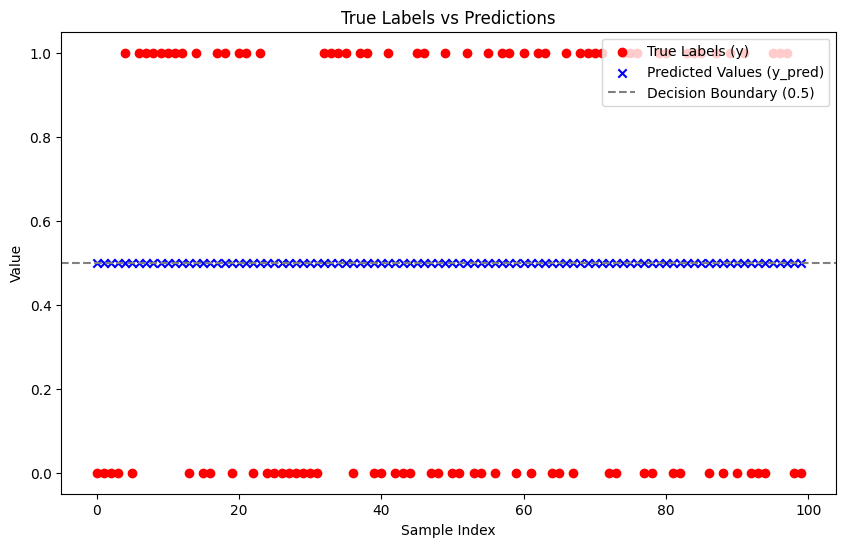

Iteration 0: np.mean(loss(X, w, y))=np.float64(0.6931471805599453)
Iteration 100: np.mean(loss(X, w, y))=np.float64(0.4140937111466302)
Iteration 200: np.mean(loss(X, w, y))=np.float64(0.31493231459645044)
Iteration 300: np.mean(loss(X, w, y))=np.float64(0.2630187434694544)
Iteration 400: np.mean(loss(X, w, y))=np.float64(0.23031571205940776)
Iteration 500: np.mean(loss(X, w, y))=np.float64(0.20746279025527362)
Iteration 600: np.mean(loss(X, w, y))=np.float64(0.19040066387412352)
Iteration 700: np.mean(loss(X, w, y))=np.float64(0.17706135720368998)
Iteration 800: np.mean(loss(X, w, y))=np.float64(0.16627118463389545)
Iteration 900: np.mean(loss(X, w, y))=np.float64(0.1573105866298579)


In [89]:
# Generate data
X, y = make_classification(n_samples=100, n_features=30)
learned_weights = logistic_regression(X, y, max_iter=1000)

Let's check the performance of the model

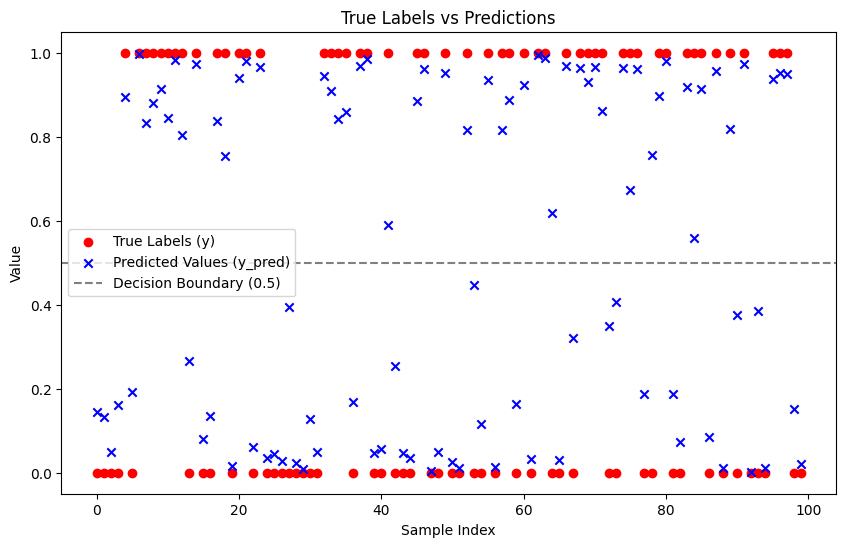

In [90]:
y_pred = sigmoid(np.dot(X, learned_weights))

plot_y_pred(y, y_pred)